# Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
df=pd.read_csv("new_co2.csv")
df

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2015,2015,7.351698e+06,NaN,NaN
1,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2016,2016,7.415273e+06,NaN,NaN
2,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2017,2017,7.333902e+06,NaN,NaN
3,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2018,2018,7.320473e+06,NaN,NaN
4,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2019,2019,7.756780e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351676,ISL,Iceland,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,Q,Quarterly,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2023-Q3,Q3-2023,2.465020e+00,NaN,NaN
351677,GRC,Greece,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,Q,Quarterly,RES_INT_OUT,"""(F) - International flight outside of country...",NSA,Non seasonally adjusted,2023-Q3,Q3-2023,2.697590e+01,NaN,NaN
351678,ISL,Iceland,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2023-08,Aug-2023,2.465020e+00,NaN,NaN
351679,ZMB,Zambia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,NRES_DOM_IN,"""(C) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2023-07,Jul-2023,2.025080e+02,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351681 entries, 0 to 351680
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LOCATION             351681 non-null  object 
 1   Country              351681 non-null  object 
 2   POLLUTANT            351681 non-null  object 
 3   Pollutant            351681 non-null  object 
 4   MEASURE              351681 non-null  object 
 5   Measure              351681 non-null  object 
 6   FLIGHT               351681 non-null  object 
 7   Flight type          351681 non-null  object 
 8   FREQUENCY            351681 non-null  object 
 9   Frequency            351681 non-null  object 
 10  SOURCE               351681 non-null  object 
 11  Source of emissions  351681 non-null  object 
 12  SEASONALITY          351681 non-null  object 
 13  Seasonality          351681 non-null  object 
 14  TIME                 351681 non-null  object 
 15  Time             

# Data preprocessing

In [4]:
df.isna().sum()

LOCATION                    0
Country                     0
POLLUTANT                   0
Pollutant                   0
MEASURE                     0
Measure                     0
FLIGHT                      0
Flight type                 0
FREQUENCY                   0
Frequency                   0
SOURCE                      0
Source of emissions         0
SEASONALITY                 0
Seasonality                 0
TIME                        0
Time                        0
Value                       0
Flag Codes             351681
Flags                  351681
dtype: int64

## Dropping unnecessary columns from the DataFrame


In [5]:
df.drop(['Country', 'POLLUTANT', 'Pollutant', 'MEASURE', 'Measure', 
         'Flight type', 'Frequency', 'Source of emissions', 'SEASONALITY', 
         'Seasonality', 'TIME', 'Flag Codes', 'Flags'], axis=1, inplace=True)

df

,LOCATION,FLIGHT,FREQUENCY,SOURCE,Time,Value
0,AUS,TOTAL,A,RES_DOM_IN,2015,7.351698e+06
1,AUS,TOTAL,A,RES_DOM_IN,2016,7.415273e+06
2,AUS,TOTAL,A,RES_DOM_IN,2017,7.333902e+06
3,AUS,TOTAL,A,RES_DOM_IN,2018,7.320473e+06
4,AUS,TOTAL,A,RES_DOM_IN,2019,7.756780e+06
...,...,...,...,...,...,...
351676,ISL,C,Q,TER_DOM,Q3-2023,2.465020e+00
351677,GRC,C,Q,RES_INT_OUT,Q3-2023,2.697590e+01
351678,ISL,C,M,TER_DOM,Aug-2023,2.465020e+00
351679,ZMB,C,M,NRES_DOM_IN,Jul-2023,2.025080e+02


## Create new feature named "climate_change_impact"

In [6]:
threshold = 100
climate_change_impact = []

for i in df['Value']:
    if i > threshold:
        climate_change_impact.append(1)
    else:
        climate_change_impact.append(0)

df['climate_change_impact'] = climate_change_impact

df

,LOCATION,FLIGHT,FREQUENCY,SOURCE,Time,Value,climate_change_impact
0,AUS,TOTAL,A,RES_DOM_IN,2015,7.351698e+06,1
1,AUS,TOTAL,A,RES_DOM_IN,2016,7.415273e+06,1
2,AUS,TOTAL,A,RES_DOM_IN,2017,7.333902e+06,1
3,AUS,TOTAL,A,RES_DOM_IN,2018,7.320473e+06,1
4,AUS,TOTAL,A,RES_DOM_IN,2019,7.756780e+06,1
...,...,...,...,...,...,...,...
351676,ISL,C,Q,TER_DOM,Q3-2023,2.465020e+00,0
351677,GRC,C,Q,RES_INT_OUT,Q3-2023,2.697590e+01,0
351678,ISL,C,M,TER_DOM,Aug-2023,2.465020e+00,0
351679,ZMB,C,M,NRES_DOM_IN,Jul-2023,2.025080e+02,1


In [7]:
df['climate_change_impact'].value_counts()

climate_change_impact
1    304642
0     47039
Name: count, dtype: int64

## Encoding categorical columns using LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

df[['LOCATION', 'FLIGHT', 'FREQUENCY', 'SOURCE', 'Time']] = df[['LOCATION', 'FLIGHT', 'FREQUENCY', 'SOURCE', 'Time']].astype(str)

df_new = df.copy()

cols_to_encode = ['LOCATION', 'FLIGHT', 'FREQUENCY', 'SOURCE', 'Time']
label_encoder = LabelEncoder()

for col in cols_to_encode:
    new_col_name = col + '_encoded'
    
    df_new[new_col_name] = label_encoder.fit_transform(df[col])

df_new = df_new.drop(columns=cols_to_encode)

df_new

,Value,climate_change_impact,LOCATION_encoded,FLIGHT_encoded,FREQUENCY_encoded,SOURCE_encoded,Time_encoded
0,7.351698e+06,1,7,2,0,4,0
1,7.415273e+06,1,7,2,0,4,1
2,7.333902e+06,1,7,2,0,4,2
3,7.320473e+06,1,7,2,0,4,3
4,7.756780e+06,1,7,2,0,4,4
...,...,...,...,...,...,...,...
351676,2.465020e+00,0,77,0,2,10,75
351677,2.697590e+01,0,65,0,2,7,75
351678,2.465020e+00,0,77,0,1,10,18
351679,2.025080e+02,1,184,0,1,0,37


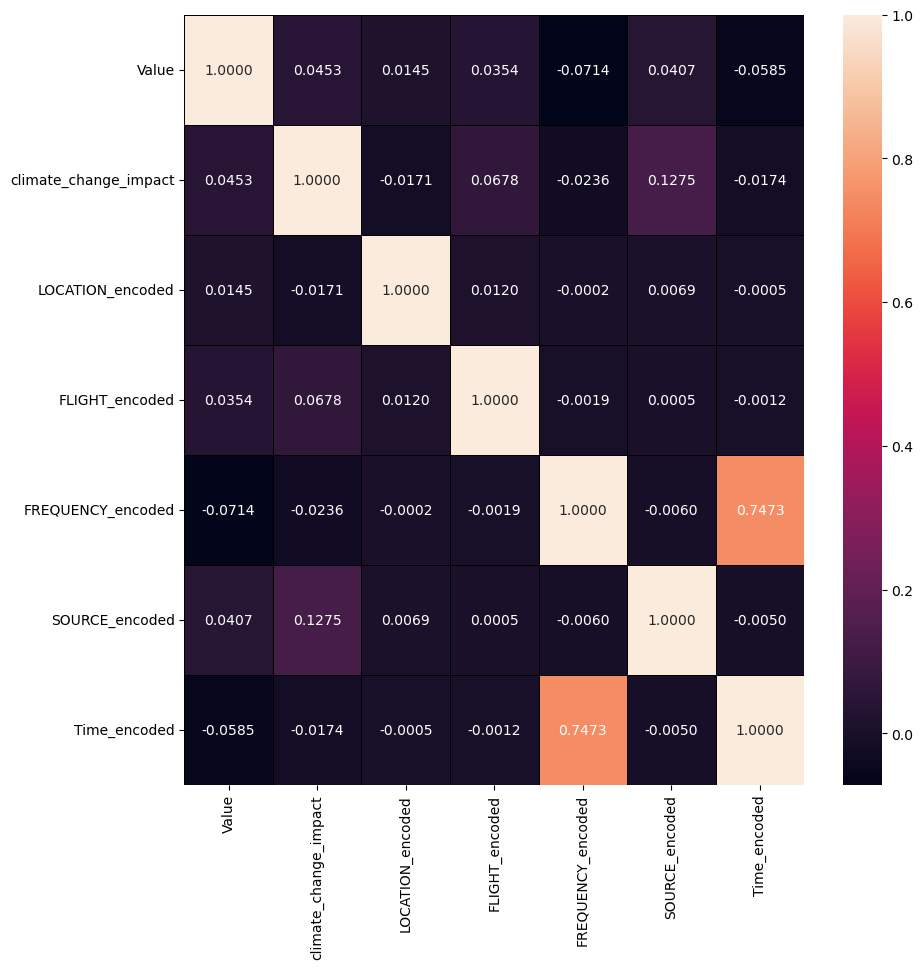

In [9]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_new.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

<Axes: xlabel='FLIGHT', ylabel='count'>

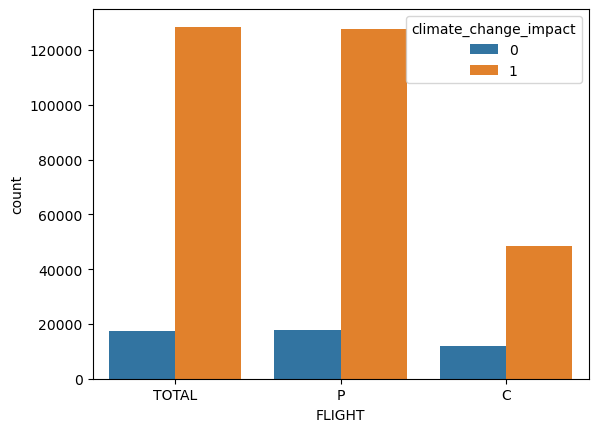

In [10]:
sns.countplot(df,x='FLIGHT',hue='climate_change_impact')

<Axes: xlabel='SOURCE_encoded', ylabel='count'>

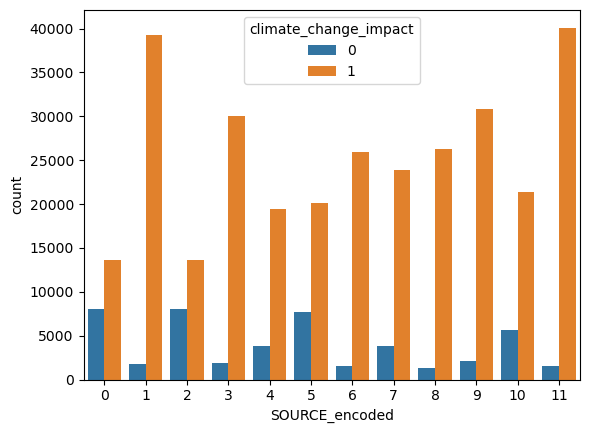

In [11]:
sns.countplot(df_new,x='SOURCE_encoded',hue='climate_change_impact')

# 1- Prediction of Climate Change Impact Based on Air Flight CO2.

<Axes: xlabel='climate_change_impact', ylabel='count'>

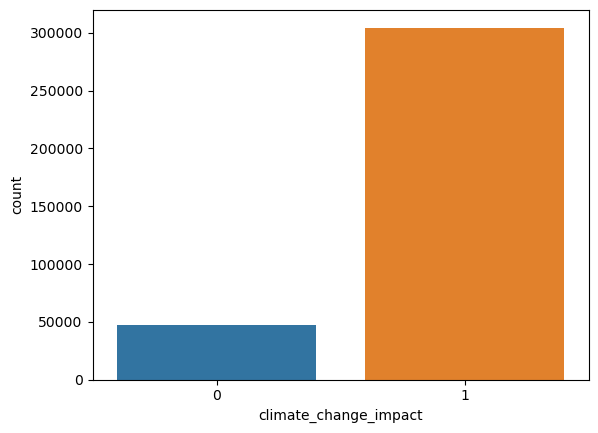

In [12]:
sns.countplot(df,x='climate_change_impact')

# 2- Top 10 CO2 emissions by time period.

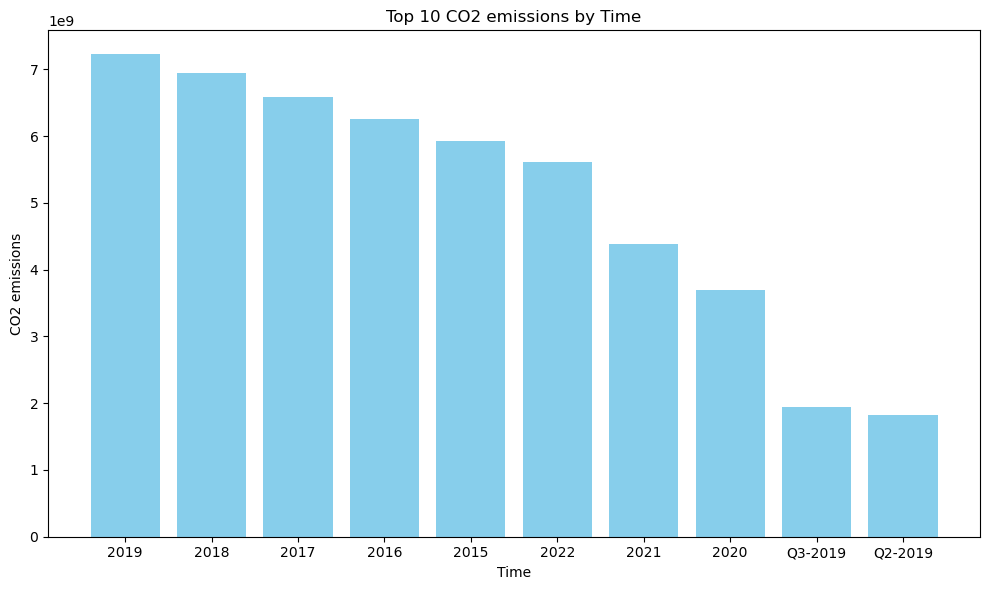

In [13]:
df_grouped = df.groupby('Time')['Value'].sum().reset_index()

df_grouped_sorted = df_grouped.sort_values(by='Value', ascending=False)

top_10_countries = df_grouped_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Time'], top_10_countries['Value'], color='skyblue')
plt.xlabel('Time')
plt.ylabel('CO2 emissions')
plt.title('Top 10 CO2 emissions by Time')
plt.tight_layout()
plt.show()

# 3- Top 10 CO2 emissions by country.

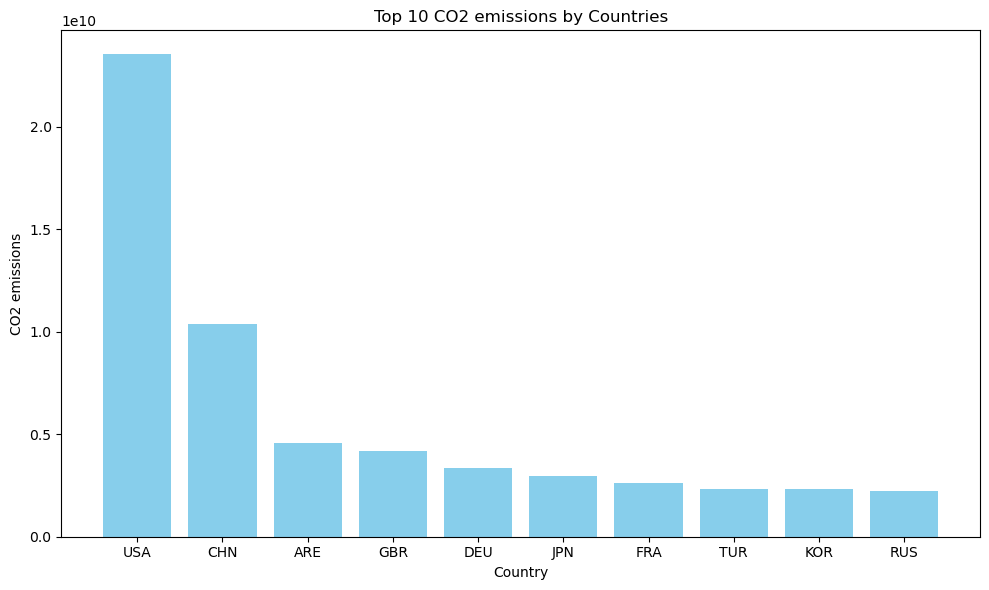

In [14]:
df_grouped = df.groupby('LOCATION')['Value'].sum().reset_index()

df_grouped_sorted = df_grouped.sort_values(by='Value', ascending=False)

top_10_countries = df_grouped_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['LOCATION'], top_10_countries['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('CO2 emissions')
plt.title('Top 10 CO2 emissions by Countries')
plt.tight_layout()
plt.show()

# Model Development

In [15]:
X = df_new.drop(['climate_change_impact'],axis=1)
y = df_new['climate_change_impact']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Training Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

# Utilize Optimization techniques

## Preprocessing Pipeline for RandomForestClassifier and DecisionTreeClassifier

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

numeric_features = ['Value','LOCATION_encoded', 'FLIGHT_encoded', 'SOURCE_encoded', 'Time_encoded','FREQUENCY_encoded']
categorical_features = []

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training Random Forest Model

In [18]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Value', 'LOCATION_encoded',
                                                   'FLIGHT_encoded',
                                                   'SOURCE_encoded',
                                                   'Time_encoded',
                                                   'FREQUENCY_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Training Decision Tree Model

In [19]:
dt_model = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Value', 'LOCATION_encoded',
                                                   'FLIGHT_encoded',
                                                   'SOURCE_encoded',
                                                   'Time_encoded',
                                                   'FREQUENCY_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Comparison of Model Accuracies

In [20]:
table = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Train Accuracy': [],
    'Test Accuracy': []
}

table['Train Accuracy'].append(lr_model.score(X_train, y_train)*100)
table['Test Accuracy'].append(lr_model.score(X_test, y_test)*100)

table['Train Accuracy'].append(rf_model.score(X_train, y_train)*100)
table['Test Accuracy'].append(rf_model.score(X_test, y_test)*100)

table['Train Accuracy'].append(dt_model.score(X_train, y_train)*100)
table['Test Accuracy'].append(dt_model.score(X_test, y_test)*100)

df = pd.DataFrame(table)
df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,99.99147,99.988626
1,Random Forest,100.00000,99.997157
2,Decision Tree,100.00000,99.988626
